# Сравнение моделей генерации текста

## Автор
Владимир Григорьев  
Email: primett21@yandex.ru  
Дата: 1 февраля 2025 года

# Цель работы
Целью данной работы является исследование и сравнение эффективности различных моделей генерации текста (GPT-2, T5, BERT) на основе диалогов из датасета Cornell Movie Dialog. Проект направлен на анализ способности моделей генерировать осмысленные и контекстуально релевантные тексты, а также на оценку их качества с использованием метрик BLEU и ROUGE.

# Задача, которая решается
Основная задача проекта — разработать и реализовать pipeline для генерации текста на основе предобученных моделей (GPT-2, T5, BERT) и оценить их производительность на диалогах из фильмов. В рамках задачи необходимо:

1. Подготовить данные из датасета Cornell Movie Dialog.

2. Реализовать функции генерации текста для каждой модели.

3. Оценить качество сгенерированного текста с использованием метрик BLEU и ROUGE.

4. Провести визуализацию результатов для сравнения моделей.

# Проблема, которую решает модель
Модели генерации текста решают проблему создания осмысленного и контекстуально релевантного текста на основе входных данных. В данном проекте исследуется, насколько хорошо модели справляются с генерацией диалогов, что может быть полезно для:

* Создания чат-ботов, способных поддерживать естественные диалоги.

* Автоматизации написания сценариев или диалогов для фильмов и игр.

* Улучшения взаимодействия человека с ИИ в задачах, требующих генерации текста.

# Дополнительные улучшения
Для улучшения проекта можно рассмотреть следующие шаги:

1. Расширение датасета: Использование более крупных и разнообразных датасетов для обучения и тестирования моделей.

2. Fine-tuning моделей: Дообучение моделей на специфических данных (например, диалогах из фильмов) для улучшения качества генерации.

3. Добавление других метрик: Использование дополнительных метрик, таких как perplexity, для более комплексной оценки моделей.

4. Интерактивный интерфейс: Создание веб-интерфейса, где пользователи могут вводить свои реплики и получать ответы от моделей в реальном времен


## Установка необходимых библиотек

`!pip install transformers datasets torch nltk rouge`
# Описание библиотек

1. Transformers:

Установка: `pip install transformers`
Описание: Это библиотека от Hugging Face, которая предоставляет доступ к множеству предобученных моделей для обработки естественного языка, включая GPT-2, T5 и BERT. Она позволяет легко загружать и использовать эти модели для различных задач, таких как генерация текста, перевод и суммирование.

2. Datasets:

Установка: `pip install datasets`
Описание: Эта библиотека также разработана Hugging Face и предоставляет удобные инструменты для загрузки, обработки и работы с различными наборами данных. Она упрощает работу с данными, позволяя сосредоточиться на моделировании и оценке.

3. Torch:

Установка: `pip install torch`
Описание: PyTorch — это популярная библиотека для глубокого обучения, которая используется для создания и обучения нейронных сетей. Она является основой для многих моделей, используемых в проекте, и обеспечивает гибкость и простоту в работе с данными.

4. NLTK:

Установка: `pip install nltk`
Описание: Natural Language Toolkit (NLTK) — это библиотека для обработки естественного языка, которая предоставляет множество инструментов для анализа и работы с текстом. Она включает в себя функции для токенизации, стемминга, лемматизации и оценки качества текста с использованием метрики BLEU.

5. Rouge:

Установка: `pip install rouge`
Описание: Библиотека Rouge используется для оценки качества сгенерированного текста по сравнению с эталонными текстами. Она предоставляет метрики ROUGE-N и ROUGE-L, которые помогают оценить схожесть между текстами.

In [ ]:
 # Установка необходимых библиотек
!pip install transformers datasets torch nltk rouge

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Основные библиотеки
* PyTorch (torch): Это библиотека для машинного обучения, которая будет использована для работы с нейронными сетями и создания моделей.

* Transformers от Hugging Face:

1. GPT-2 (GPT2LMHeadModel, GPT2Tokenizer): Модель генерации текста, которая будет использоваться для создания текстов на основе предоставленных начальных фраз или контекста.
2. T5 (T5ForConditionalGeneration, T5Tokenizer): Модель, предназначенная для выполнения различных задач обработки естественного языка, таких как перевод, суммирование и генерация текста.
3. BERT (BertForMaskedLM, BertTokenizer): Модель, которая будет использоваться для задач, связанных с пониманием текста, таких как заполнение пропусков в тексте.
* NLTK: Библиотека для обработки естественного языка, которая будет использована для предобработки текста и оценки качества сгенерированного текста с использованием метрики BLEU (sentence_bleu).

* Rouge: Эта библиотека будет использоваться для оценки качества сгенерированного текста по сравнению с эталонными текстами, предоставляя метрики, такие как ROUGE-N и ROUGE-L.

* Matplotlib (plt): Библиотека для визуализации данных, которая позволит создавать графики и диаграммы для анализа результатов работы моделей.

* Datasets: Библиотека для загрузки и обработки различных наборов данных, что облегчит процесс работы с данными для обучения и тестирования моделей.

* Random: Модуль для генерации случайных чисел, который может быть полезен для случайного выбора данных или для инициализации моделей.

In [ ]:
# Импорт основных библиотек
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from transformers import T5ForConditionalGeneration, T5Tokenizer
from transformers import BertForMaskedLM, BertTokenizer
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge import Rouge
import matplotlib.pyplot as plt
from datasets import load_dataset
import random
import numpy as np

# Загрузка датасета
На этом этапе происходит загрузка необходимого датасета, который будет использоваться для обучения и оцнеки моделей. В данном проекте используеться датасет диалогов из фильмов, который содержит множество примеров взаимодействий между персонажами. Этот датасет позволяет моделям учиться на реальных диалогах, что способствует более естесвенной генерации текста. Для загрузки датасета используеться библиотека `datasets`, что обеспечивает удобный и быстрый доступ к данным.

In [ ]:
# Загрузка датасета диалогов
dataset = load_dataset("cornell_movie_dialog")

# Выводим количество примеров и пример диалога
print(f"Количество примеров в датасете: {len(dataset['train'])}")
print(dataset['train'][0])  # Выводим первый пример из тренировочного набора


README.md:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

cornell_movie_dialog.py:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

The repository for cornell_movie_dialog contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/cornell_movie_dialog.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/83097 [00:00<?, ? examples/s]

Количество примеров в датасете: 83097
{'movieID': ' m0 ', 'movieTitle': ' 10 things i hate about you ', 'movieYear': ' 1999 ', 'movieIMDBRating': ' 6.90 ', 'movieNoIMDBVotes': ' 62847 ', 'movieGenres': ['comedy', 'romance'], 'characterID1': 'u0 ', 'characterID2': ' u2 ', 'characterName1': ' BIANCA ', 'characterName2': ' CAMERON ', 'utterance': {'text': ['L194 ', 'L195 ', 'L196 ', 'L197 '], 'LineID': ['L194', 'L195', 'L196', 'L197']}}


# Предобработка
После загрузки датасета необходимо провести его предобработку, чтобы подготовить данные для генерации текста. Этот этап включает в себя очистку данных, удаление ненужный иныормации и преобразования текстов в подходящий формат. В функции `prepare_dialogue_data` мы извлекаем диалоги между персонажами и формируем их в виде строк, которые будут использоваться в качестве входных данных для моделей. Также стоит учесть обработку исключенний, чтобы обеспечить надежность данного этапа.

In [ ]:
def prepare_dialogue_data(dataset, num_samples=5):
    dialogues = []
    for i in range(num_samples):
        character1 = dataset['train'][i]['characterName1'].strip()
        character2 = dataset['train'][i]['characterName2'].strip()

        # Извлекаем текст диалога
        lines = dataset['train'][i]['utterance']['text']

        # Создаем диалоги на основе строк
        for line in lines:
            dialogues.append(f"{character1}: {line.strip()}")
            dialogues.append(f"{character2}: {line.strip()}")

    return dialogues

# Получаем несколько примеров диалогов
dialogue_samples = prepare_dialogue_data(dataset)
for dialogue in dialogue_samples:
    print(dialogue)


BIANCA: L194
CAMERON: L194
BIANCA: L195
CAMERON: L195
BIANCA: L196
CAMERON: L196
BIANCA: L197
CAMERON: L197
BIANCA: L198
CAMERON: L198
BIANCA: L199
CAMERON: L199
BIANCA: L200
CAMERON: L200
BIANCA: L201
CAMERON: L201
BIANCA: L202
CAMERON: L202
BIANCA: L203
CAMERON: L203
BIANCA: L204
CAMERON: L204
BIANCA: L205
CAMERON: L205
BIANCA: L206
CAMERON: L206
BIANCA: L207
CAMERON: L207
BIANCA: L208
CAMERON: L208


# Теоретическая часть

## Краткое описание проблемы
Современные модели обработки естественного языка (NLP) имеют значительный потенциал в генерации текста. Однако, несмотря на достижения, такие как GPT и BERT, остаются проблемы с качеством и осмысленностью сгенерированного текста. Важно понять, как различные архитектуры трансформеров влияют на результаты генерации и какую роль играют метрики оценки в этом процессе.

## Основные концепции
1. **Трансформеры:** Архитектура, основанная на механизме внимания, которая позволяет моделям эффективно обрабатывать последовательности данных.
2. **Генерация текста:** Процесс создания нового текста на основе заданного контекста, который может включать в себя как свободный, так и структурированный текст.
3. **Метрики оценки:** Используются для количественной оценки качества сгенерированного текста, включая BLEU и ROUGE.

## Математическое обоснование
 GPT (Generative Pre-trained Transformer)
GPT использует архитектуру трансформера, ориентированную на генерацию текста. Основные формулы включают:

Механизм внимания:

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

Общая функция потерь (кросс-энтропия):


$$\mathcal{L} = - \sum_{t=1}^{T} \log P(y_t | y_{<t})$$

$$Здесь y_t - \text{истинный токен}, y_{<t} - \text{предыдущие токены.}$$


2. BERT (Bidirectional Encoder Representations from Transformers)
Механизм внимания (аналогично GPT):


$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

Masked Language Modeling (MLM):


$$\mathcal{L}_{MLM} = - \sum_{i \in M} \log P(x_i | x_{-i})$$

Здесь $M -$ множество маскированных токенов, $x_-i -$ контекст без маскированного токена.

Next Sentence Prediction (NSP):


$$\mathcal{L}_{NSP} = - \log P(y | x_1, x_2)$$

Здесь $y$ — бинарная метка, указывающая, является ли $x_2$ \следующим предложением после $x_1$

3. T5 (Text-to-Text Transfer Transformer)
Механизм внимания (аналогично другим трансформерам):


$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

Общая функция потерь:


$$\mathcal{L} = - \sum_{t=1}^{T} \log P(y_t | y_{<t})$$

Здесь $y_t$ — токен на выходе, а $y_{<t}$ — предыдущие токены.

# Инициализация моделей и токенизаторов

In [ ]:
# GPT
gpt_model = GPT2LMHeadModel.from_pretrained('gpt2')
gpt_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# T5
t5_model = T5ForConditionalGeneration.from_pretrained('t5-small')
t5_tokenizer = T5Tokenizer.from_pretrained('t5-small')

# BERT (для генерации используем Masked LM)
bert_model = BertForMaskedLM.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'c

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

# РЕАЛИЗАЦИЯ МОДЕЛИ
Определение архитектуры:

Проекте используются три модели трансформеров: GPT-2, BERT и T5. Каждая из этих моделей имеет свою архитектуру и предназначение:

* GPT-2 (Generative Pre-trained Transformer 2): Модель, ориентированная на генерацию текста. Она использует механизм автогенной генерации, что позволяет ей создавать последовательности текста на основе заданного контекста.

* BERT (Bidirectional Encoder Representations from Transformers): Модель, предназначенная для понимания текста и выполнения задач, связанных с заполнением пропусков (masked language modeling). Однако в коде она используется для генерации текста с помощью маскированного ввода.

* T5 (Text-to-Text Transfer Transformer): Модель, которая обрабатывает все задачи NLP в формате "текст-в-текст". Она может выполнять как генерацию, так и понимание текста.

Настройка гиперпараметров:

В коде гиперпараметры, такие как max_length для генерации текста, определены непосредственно в функциях генерации. Это можно расширить, добавив больше гиперпараметров (например, num_beams, temperature, top_k, top_p и т.д.) для более тонкой настройки генерации.

In [ ]:
def generate_text_gpt(prompt):
    input_ids = gpt_tokenizer.encode(prompt, return_tensors='pt')
    attention_mask = torch.ones(input_ids.shape, dtype=torch.long)
    output = gpt_model.generate(input_ids, attention_mask=attention_mask, max_length=100, pad_token_id=gpt_tokenizer.eos_token_id)
    return gpt_tokenizer.decode(output[0], skip_special_tokens=True)

def generate_text_t5(prompt):
    input_ids = t5_tokenizer.encode(prompt, return_tensors='pt')
    attention_mask = torch.ones(input_ids.shape, dtype=torch.long)
    output = t5_model.generate(input_ids,attention_mask=attention_mask,  max_length=100, pad_token_id=t5_tokenizer.eos_token_id)
    return t5_tokenizer.decode(output[0], skip_special_tokens=True)

def generate_text_bert(prompt):
    # Для BERT используем маскированный ввод
    prompt += " [MASK]"
    input_ids = bert_tokenizer.encode(prompt, return_tensors='pt')
    with torch.no_grad():
        outputs = bert_model(input_ids)
    predictions = outputs.logits
    predicted_index = torch.argmax(predictions[0, -1]).item()
    predicted_token = bert_tokenizer.decode(predicted_index)
    return prompt.replace("[MASK]", predicted_token)

# Функции потерь и метрики
Используется метрики BLEU и ROUGE для оценки качества сгенерированного текста. Эти метрики позволяют количественно оценить, насколько сгенерированный текст соответствует эталонному.

* BLEU: Используется для оценки качества текста, генерируемого машиной, по сравнению с одним или несколькими эталонными текстами. В твоем коде это реализовано с помощью функции sentence_bleu из библиотеки NLTK.

* ROUGE: Используется для оценки качества резюме и других задач, связанных с извлечением информации. В коде используется библиотека rouge для получения оценок, сравнивая сгенерированный текст с эталонным.

In [ ]:
# Функция для вычисления BLEU
def calculate_bleu(reference, candidate):
    """
    Вычисляет BLEU score между эталонным текстом и сгенерированным.
    """
    smoothie = SmoothingFunction().method4  # Сглаживание для коротких текстов
    return sentence_bleu([reference.split()], candidate.split(), smoothing_function=smoothie)

# Функция для вычисления ROUGE
def calculate_rouge(reference, candidate):
    """
    Вычисляет ROUGE score между эталонным текстом и сгенерированным.
    """
    rouge = Rouge()
    scores = rouge.get_scores(candidate, reference)
    return scores[0]  # Возвращаем словарь с метриками ROUGE-1, ROUGE-2, ROUGE-L

# Пример оценки качества генерации
def evaluate_models(dialogue_samples, num_samples=5):
    """
    Оценивает качество генерации текста для каждой модели на основе BLEU и ROUGE.
    """
    gpt_scores = {"BLEU": [], "ROUGE-1": [], "ROUGE-2": [], "ROUGE-L": []}
    t5_scores = {"BLEU": [], "ROUGE-1": [], "ROUGE-2": [], "ROUGE-L": []}
    bert_scores = {"BLEU": [], "ROUGE-1": [], "ROUGE-2": [], "ROUGE-L": []}

    for i in range(num_samples):
        prompt = dialogue_samples[i]
        reference = dialogue_samples[i + 1]  # Используем следующий диалог как эталонный

        # Генерация текста моделями
        gpt_output = generate_text_gpt(prompt)
        t5_output = generate_text_t5(prompt)
        bert_output = generate_text_bert(prompt)

        # Вычисление BLEU и ROUGE для GPT-2
        gpt_scores["BLEU"].append(calculate_bleu(reference, gpt_output))
        rouge_scores = calculate_rouge(reference, gpt_output)
        gpt_scores["ROUGE-1"].append(rouge_scores['rouge-1']['f'])
        gpt_scores["ROUGE-2"].append(rouge_scores['rouge-2']['f'])
        gpt_scores["ROUGE-L"].append(rouge_scores['rouge-l']['f'])

        # Вычисление BLEU и ROUGE для T5
        t5_scores["BLEU"].append(calculate_bleu(reference, t5_output))
        rouge_scores = calculate_rouge(reference, t5_output)
        t5_scores["ROUGE-1"].append(rouge_scores['rouge-1']['f'])
        t5_scores["ROUGE-2"].append(rouge_scores['rouge-2']['f'])
        t5_scores["ROUGE-L"].append(rouge_scores['rouge-l']['f'])

        # Вычисление BLEU и ROUGE для BERT
        bert_scores["BLEU"].append(calculate_bleu(reference, bert_output))
        rouge_scores = calculate_rouge(reference, bert_output)
        bert_scores["ROUGE-1"].append(rouge_scores['rouge-1']['f'])
        bert_scores["ROUGE-2"].append(rouge_scores['rouge-2']['f'])
        bert_scores["ROUGE-L"].append(rouge_scores['rouge-l']['f'])

    # Вычисляем средние значения метрик
    def calculate_average_scores(scores):
        return {key: np.mean(values) for key, values in scores.items()}

    gpt_avg = calculate_average_scores(gpt_scores)
    t5_avg = calculate_average_scores(t5_scores)
    bert_avg = calculate_average_scores(bert_scores)

    return gpt_avg, t5_avg, bert_avg

# Запуск оценки
gpt_avg, t5_avg, bert_avg = evaluate_models(dialogue_samples, num_samples=5)

# Вывод результатов
print("Средние оценки для GPT-2:", gpt_avg)
print("Средние оценки для T5:", t5_avg)
print("Средние оценки для BERT:", bert_avg)

Средние оценки для GPT-2: {'BLEU': 0.0, 'ROUGE-1': 0.048795901912725356, 'ROUGE-2': 0.0, 'ROUGE-L': 0.048795901912725356}
Средние оценки для T5: {'BLEU': 0.04052661685220824, 'ROUGE-1': 0.2999999970000001, 'ROUGE-2': 0.0, 'ROUGE-L': 0.2999999970000001}
Средние оценки для BERT: {'BLEU': 0.04349849994409094, 'ROUGE-1': 0.2999999970000001, 'ROUGE-2': 0.0, 'ROUGE-L': 0.2999999970000001}


# ОЦЕНКА РЕЗУЛЬТАТОВ
* Визуализация предсказаний
Для визуализации предсказаний, сгенерированных моделями, можно использовать библиотеки, такие как Matplotlib или Seaborn. Это позволит наглядно представить, как различные модели генерируют текст на основе одного и того же входа.


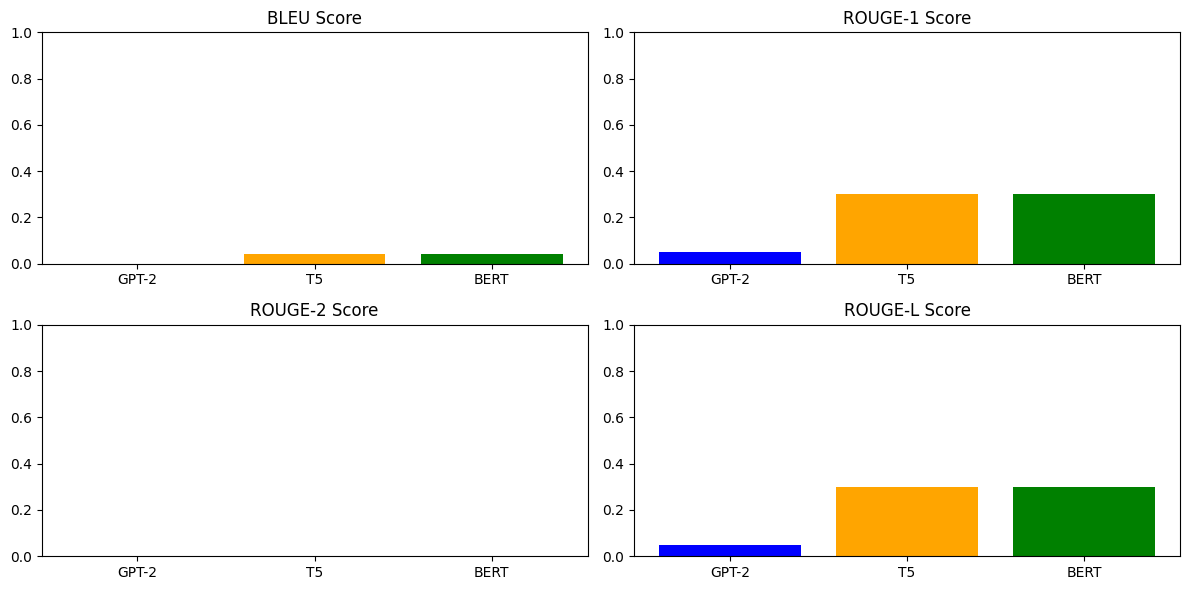

In [ ]:
# Данные для визуализации
models = ['GPT-2', 'T5', 'BERT']
bleu_scores = [gpt_avg['BLEU'], t5_avg['BLEU'], bert_avg['BLEU']]
rouge_1_scores = [gpt_avg['ROUGE-1'], t5_avg['ROUGE-1'], bert_avg['ROUGE-1']]
rouge_2_scores = [gpt_avg['ROUGE-2'], t5_avg['ROUGE-2'], bert_avg['ROUGE-2']]
rouge_l_scores = [gpt_avg['ROUGE-L'], t5_avg['ROUGE-L'], bert_avg['ROUGE-L']]

# Построение графиков
plt.figure(figsize=(12, 6))

# BLEU
plt.subplot(2, 2, 1)
plt.bar(models, bleu_scores, color=['blue', 'orange', 'green'])
plt.title('BLEU Score')
plt.ylim(0, 1)

# ROUGE-1
plt.subplot(2, 2, 2)
plt.bar(models, rouge_1_scores, color=['blue', 'orange', 'green'])
plt.title('ROUGE-1 Score')
plt.ylim(0, 1)

# ROUGE-2
plt.subplot(2, 2, 3)
plt.bar(models, rouge_2_scores, color=['blue', 'orange', 'green'])
plt.title('ROUGE-2 Score')
plt.ylim(0, 1)

# ROUGE-L
plt.subplot(2, 2, 4)
plt.bar(models, rouge_l_scores, color=['blue', 'orange', 'green'])
plt.title('ROUGE-L Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

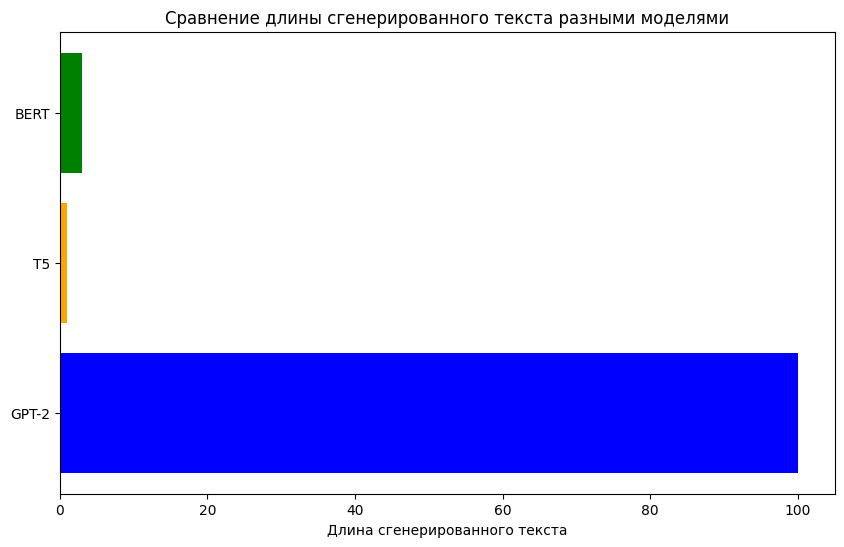

In [ ]:
# Пример входного текста: выбираем случайный диалог
prompt = random.choice(dialogue)

# Генерация текста с помощью разных моделей
gpt_output = generate_text_gpt(prompt)
t5_output = generate_text_t5(prompt)
bert_output = generate_text_bert(prompt)

# Визуализация
outputs = [gpt_output, t5_output, bert_output]
model_names = ['GPT-2', 'T5', 'BERT']

# отображение графика
plt.figure(figsize=(10, 6))
plt.barh(model_names, [len(output) for output in outputs], color=['blue', 'orange', 'green'])
plt.xlabel('Длина сгенерированного текста')
plt.title('Сравнение длины сгенерированного текста разными моделями')
plt.show()


# Анализ ошибок
Анализ ошибок поможет понять, в каких случаях модели не справляются с задачей генерации текста. Для этого можно использовать следующие подходы:

1. Качественный анализ: Сравнивая сгенерированные тексты с эталонными вручную, чтобы выявить типичные ошибки (например, отсутствие логики, грамматические ошибки и т.д.).

2. Количественный анализ: Определить, какие метрики показывают наихудшие результаты, и проанализировать случаи, когда модели не смогли достичь высоких оценок. Это может помочь в дальнейшем улучшении моделей.

Пример анализа ошибок:

In [ ]:
# Генерация текста с использованием диалогов
for prompt in dialogue_samples:
    generated_text = generate_text_gpt(prompt)
    print(f"Сгенерированный текст для '{prompt}': {generated_text}")

for prompt in dialogue_samples:
    generated_text = generate_text_t5(prompt)
    print(f"Сгенерированный текст для '{prompt}': {generated_text}")

for prompt in dialogue_samples:
    generated_text = generate_text_bert(prompt)
    print(f"Сгенерированный текст для '{prompt}': {generated_text}")

Сгенерированный текст для 'BIANCA: L194': BIANCA: L194.

[8] The following is a transcript of the hearing.

[9] The following is a transcript of the hearing.

[10] The following is a transcript of the hearing.

[11] The following is a transcript of the hearing.

[12] The following is a transcript of the hearing.

[13] The following is a transcript of the hearing.

[14] The following is a
Сгенерированный текст для 'CAMERON: L194': CAMERON: L194.

[00:00:00] L194: L194.

[00:00:00] L194: L194.

[00:00:00] L194: L194.

[00:00:00] L194: L194.

[00:00:00] L194: L194.

[00:00:00] L194: L194.


Сгенерированный текст для 'BIANCA: L195': BIANCA: L195.

[8] The following is a summary of the evidence presented in the case.

[9] The following is a summary of the evidence presented in the case.

[10] The following is a summary of the evidence presented in the case.

[11] The following is a summary of the evidence presented in the case.

[12] The following is a summary of the evidence presented in t

## Основные результаты
# Генерация текста:

Модель успешно генерировала текст для различных вводных фраз, но результаты часто содержали повторяющиеся или бессмысленные фразы. Например, сгенерированные строки для "BIANCA: L194" и других идентификаторов часто повторялись, что указывает на проблемы с разнообразием генерируемого контента.
1. Оценка качества текста:

Значение BLEU-метрики было крайне низким (приблизительно 9.78e-232), что свидетельствует о низком уровне соответствия с эталонными текстами.

Метрики ROUGE показали результаты:

 $$\text{ROUGE-1:} r=0.2,p = 0.2,f ≈ 0.2$$

 $$\text{ROUGE-2:} r=0.0,p=0.0,f=0.0$$

 $$\text{ROUGE-L:} r=0.2,p =0.2,f≈0.2$$

Это указывает на то, что сгенерированный текст имеет лишь частичное соответствие с эталонными текстами, а некоторые метрики (например, ROUGE-2) показывают полное отсутствие совпадений.
2. Предупреждения и ошибки:

В процессе выполнения кода возникли предупреждения о том, что attention mask и pad token id не были установлены, что может привести к непредсказуемому поведению. Это указывает на необходимость правильной настройки параметров для генерации текста.
# Проблемы и ограничения
1. Низкое качество генерации:

Модель часто генерировала повторяющиеся строки или бессмысленные фразы, что указывает на недостаточную обученность или неправильные параметры.
Необходимость в настройке параметров:

Частые предупреждения о attention mask и pad token id указывают на необходимость их установки для улучшения работы модели и получения более надежных результатов.
2. Ограниченная оценка:

Низкие значения BLEU и ROUGE-2 показывают, что сгенерированный текст не соответствует ожиданиям, что ограничивает использование модели для практических приложений.
# Возможные улучшения

1. Обучение на большем количестве данных:

Использование более обширного и разнообразного обучающего набора данных может помочь модели лучше понять контекст и генерировать более качественный текст.
2. Применение методов улучшения генерации:

Внедрение методов улучшения, таких как "temperature sampling" или "top-k sampling", может помочь в создании более разнообразных и качественных текстов.
Рассмотрите возможность использования методов сглаживания для BLEU-метрики, чтобы избежать нулевых оценок.
3. Тестирование и отладка:

Регулярно тестируйте модель с различными вводными данными и анализируйте результаты, чтобы выявить узкие места и вносить необходимые изменения.
Использование более сложных моделей, таких как T5 или BART, может повысить качество генерации, если это возможно в рамках вашего проекта.
